# CASE STUDY: FASHION CLASS CLASSIFICATION 

In [ ]:
### STEP #1: IMPORTING DATA

In [106]:
# importing libraries 
import pandas as pd # Importing Pandas for data manipulation using dataframes
import numpy as np # Importing Numpy for statistical data analysis 
import matplotlib.pyplot as plt # Importing matplotlib for data visualisation
import seaborn as sns
import random


In [107]:
# creating dataframes for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [ ]:
### STEP #2: VISUALIZATION OF THE DATASET  

In [110]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [114]:
fashion_train_df.shape

(60000, 785)

In [115]:
# Creating train and test arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [116]:
training.shape

(60000, 785)

In [117]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [118]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

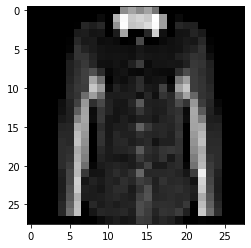

In [120]:
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [121]:
label = training[i,0]
label


6.0

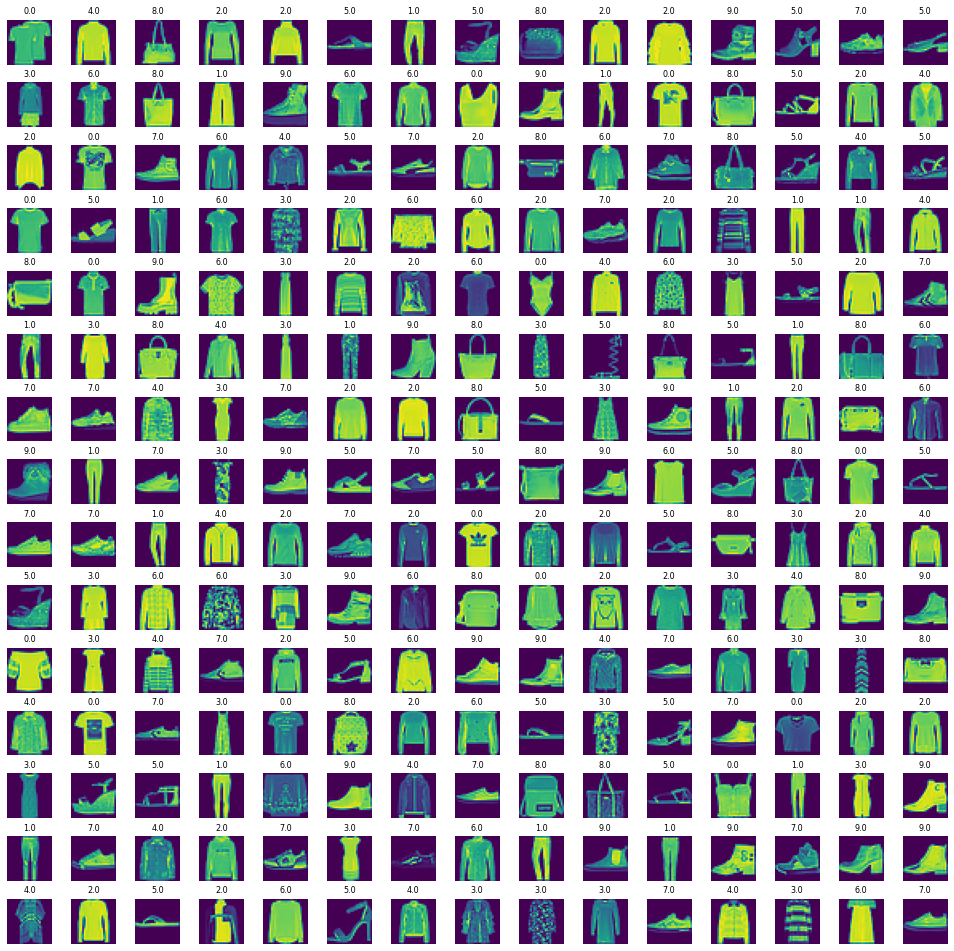

In [122]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

In [ ]:
### STEP #4: TRAINING THE MODEL

In [123]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [125]:
X_train.shape

(48000, 784)

In [126]:
y_train.shape

(48000,)

In [127]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [128]:
X_train.shape

(48000, 28, 28, 1)

In [129]:
X_test.shape

(10000, 28, 28, 1)

In [130]:
X_validate.shape

(12000, 28, 28, 1)

In [131]:
# Importing train_test_split from scikit library
# Importing Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [132]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))


In [133]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [134]:
epochs = 10

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



Epoch 1/10
94/94 [==============================] - 3s 30ms/step - loss: 1.2390 - accuracy: 0.5865 - val_loss: 0.7088 - val_accuracy: 0.7473
Epoch 2/10
94/94 [==============================] - 3s 29ms/step - loss: 0.6550 - accuracy: 0.7645 - val_loss: 0.5854 - val_accuracy: 0.7852
Epoch 3/10
94/94 [==============================] - 3s 29ms/step - loss: 0.5736 - accuracy: 0.7921 - val_loss: 0.5229 - val_accuracy: 0.8112
Epoch 4/10
94/94 [==============================] - 3s 30ms/step - loss: 0.5333 - accuracy: 0.8068 - val_loss: 0.5058 - val_accuracy: 0.8163
Epoch 5/10
94/94 [==============================] - 3s 30ms/step - loss: 0.5072 - accuracy: 0.8161 - val_loss: 0.4740 - val_accuracy: 0.8330
Epoch 6/10
94/94 [==============================] - 3s 28ms/step - loss: 0.4923 - accuracy: 0.8201 - val_loss: 0.4637 - val_accuracy: 0.8323
Epoch 7/10
94/94 [==============================] - 2s 26ms/step - loss: 0.4785 - accuracy: 0.8266 - val_loss: 0.4479 - val_accuracy: 0.8411
Epoch 8/10
94

In [ ]:
### STEP #5: EVALUATING THE MODEL

In [135]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8475
Test Accuracy : 0.848


In [136]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)


In [143]:
#for i in range(len(predicted_classes)):
#axes[2].imshow(X_test[2].reshape(28,28))
#print("{}".format(predicted_classes[2]))

print("Prediction Class = {:0.3f}",np.argmax(predicted_classes[3]))
#predicted_classes.shape

Prediction Class = {:0.3f} 6


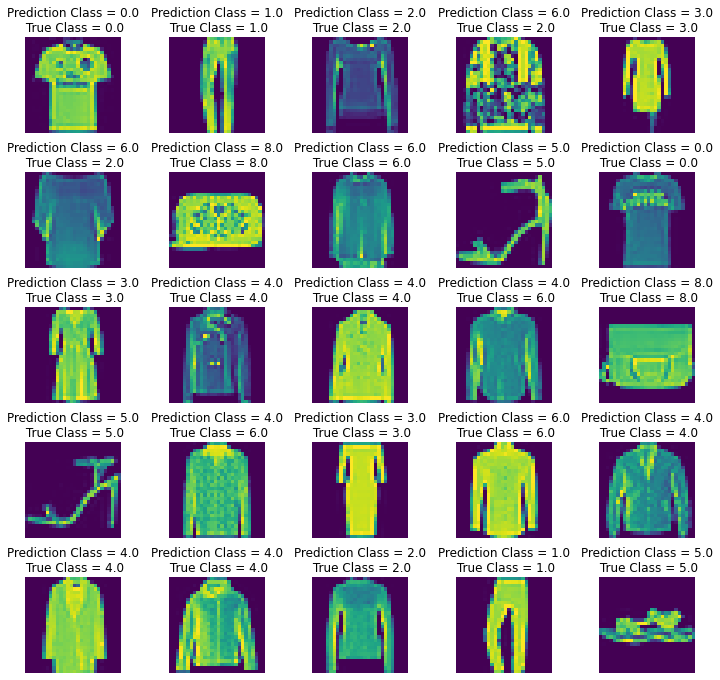

In [144]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(np.argmax(predicted_classes[i]), y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [157]:

p_c=[np.argmax(row) for row in predicted_classes]

In [167]:
p_c=np.array(p_c)

In [169]:
p_c.shape

(10000,)

<AxesSubplot:>

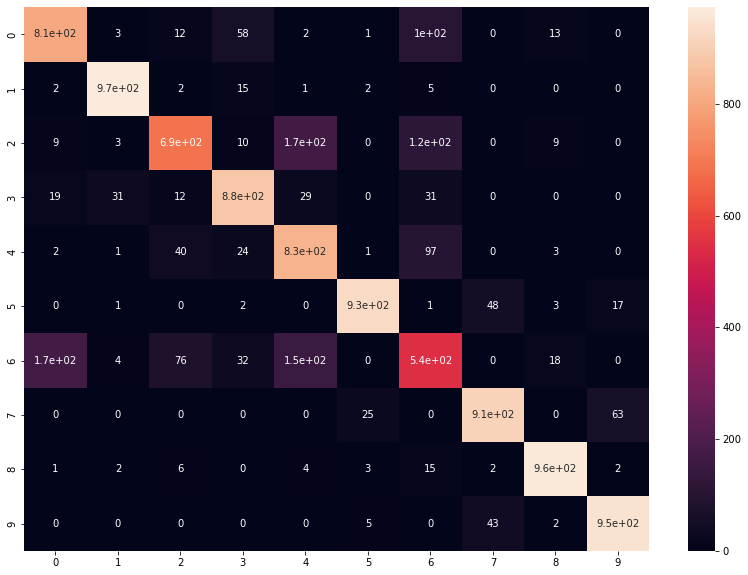

In [170]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, p_c)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [172]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, p_c, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.81      0.80      1000
     Class 1       0.96      0.97      0.96      1000
     Class 2       0.82      0.69      0.75      1000
     Class 3       0.86      0.88      0.87      1000
     Class 4       0.70      0.83      0.76      1000
     Class 5       0.96      0.93      0.94      1000
     Class 6       0.60      0.55      0.57      1000
     Class 7       0.91      0.91      0.91      1000
     Class 8       0.95      0.96      0.96      1000
     Class 9       0.92      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

